Question 1 -
Train a deep learning model which would classify the vegetables based on the
images provided. The dataset can be accessed from the given link.


In [1]:
import os

In [2]:
os.chdir(r'C:\Users\DELL\Downloads\Inueron assignment\Deep Learning\Vegetable_detection_project')

In [33]:
import albumentations as A
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda

In [34]:
image_height=224
image_width=224
BATCH_SIZE=32
CHANNELS=3


In [35]:
train_data=tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Images/train",
    image_size=(image_height,image_width),
    batch_size=BATCH_SIZE,
    shuffle=True

)

Found 15000 files belonging to 15 classes.


In [81]:
class_names=train_data.class_names
print(class_names)


['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']


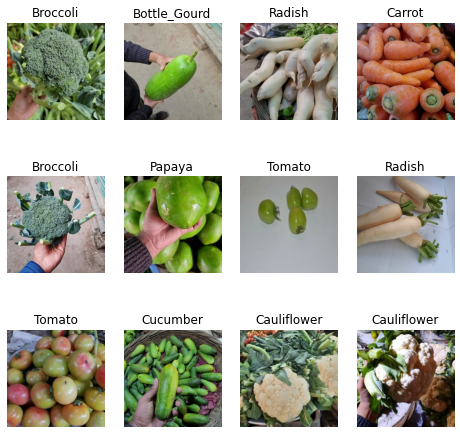

In [37]:
plt.figure(figsize=(8,8))
for image_batch,label_batch in train_data.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(np.array(image_batch[i])/255)
        plt.title(class_names[label_batch[i].numpy()])
        plt.axis('off')
    

In [38]:
test_data=tf.keras.preprocessing.image_dataset_from_directory(
    "Vegetable Images/test",
    shuffle=True,
    image_size=(image_height,image_width),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 15 classes.


In [39]:
validation_data=tf.keras.preprocessing.image_dataset_from_directory(
     "Vegetable Images/validation",
    shuffle=True,
    image_size=(image_height,image_width),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 15 classes.


In [40]:
n_class=len(class_names)
n_class

15

In [62]:
resize_rescale=tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_height,image_width),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [67]:
input_shape=(BATCH_SIZE,image_height,image_width,CHANNELS)
model=tf.keras.models.Sequential([
    resize_rescale,
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(n_class,activation='softmax')
    
])
model.build(input_shape=input_shape)

In [68]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_18 (Sequential)  (32, 224, 224, 3)         0         
                                                                 
 conv2d_43 (Conv2D)          (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_43 (MaxPoolin  (32, 111, 111, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (32, 109, 109, 32)        9248      
                                                                 
 max_pooling2d_44 (MaxPoolin  (32, 54, 54, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (32, 52, 52, 32)        

In [69]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)

In [70]:
histoy=model.fit(
    train_data,
    validation_data=validation_data,
    epochs=3,
    batch_size=32,
    verbose=1
)

Epoch 1/3
469/469 [==============================] - 913s 2s/step - loss: 1.3074 - accuracy: 0.5581 - val_loss: 0.8140 - val_accuracy: 0.7417
Epoch 2/3
469/469 [==============================] - 942s 2s/step - loss: 0.5295 - accuracy: 0.8287 - val_loss: 0.6028 - val_accuracy: 0.8103
Epoch 3/3
469/469 [==============================] - 944s 2s/step - loss: 0.3251 - accuracy: 0.8980 - val_loss: 0.2946 - val_accuracy: 0.9163


In [71]:
model.save("deep_learning_models/1")

INFO:tensorflow:Assets written to: deep_learning_models/1\assets


INFO:tensorflow:Assets written to: deep_learning_models/1\assets


In [72]:
model.evaluate(test_data)

94/94 [==============================] - 78s 805ms/step - loss: 0.2826 - accuracy: 0.9103


[0.2825775146484375, 0.9103333353996277]

In [73]:
import cv2

In [74]:
test_img=cv2.imread(r'C:\Users\DELL\Downloads\Inueron assignment\Deep Learning\Vegetable_detection_project\Vegetable Images\test\\1019.jpg')

In [75]:
image=test_img/255

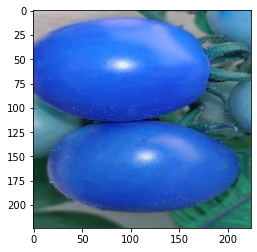

In [76]:
plt.imshow(image)

In [77]:
image=np.expand_dims(image,axis=0)

In [78]:
image.shape

(1, 224, 224, 3)

In [79]:
np.argmax(model.predict(image))

1/1 [==============================] - 1s 558ms/step


2

In [80]:
class_names[2]

'Bottle_Gourd'